<a href="https://colab.research.google.com/github/bitnurihan/Capstone_Project_Starbucks/blob/master/Analysing_starbucks_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # library to handle data in a vectorized manner
!pip install geopandas
import geopandas as gpd
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

     |████████████████████████████████| 931kB 2.7MB/s 
     |████████████████████████████████| 14.7MB 302kB/s 
     |████████████████████████████████| 10.4MB 52.8MB/s 
/bin/bash: conda: command not found
Libraries imported.


In [0]:
df = pd.read_csv('/content/drive/My Drive/Starbucks/neighbourhood-profiles-2016.csv')
df.head()

_id                  Category                     Topic  \
0    1  NeighbourhoodInformation  NeighbourhoodInformation   
1    2  NeighbourhoodInformation  NeighbourhoodInformation   
2    3                Population    Populationanddwellings   
3    4                Population    Populationanddwellings   
4    5                Population    Populationanddwellings   

                     DataSource             Characteristic CityofToronto  \
0                 CityofToronto        NeighbourhoodNumber           NaN   
1                 CityofToronto        TSNS2020Designation           NaN   
2  CensusProfile98-316-X2016001             Population2016       2731571   
3  CensusProfile98-316-X2016001             Population2011       2615060   
4  CensusProfile98-316-X2016001  PopulationChange2011-2016         4.50%   

  AgincourtNorth AgincourtSouth-MalvernWest      Alderwood          Annex  \
0            129                        128             20             95   
1  NoDesignation              NoDesignation  NoDesignation  NoDesignation   
2          29113                      23757          12054          30526   
3          30279                      21988          11904          29177   
4         -3.90%                      8.00%          1.30%          4.60%   

  Banbury-DonMills  BathurstManor BayStreetCorridor BayviewVillage  \
0               42             34                76             52   
1    NoDesignation  NoDesignation     NoDesignation  NoDesignation   
2            27695          15873             25797          21396   
3            26918          15434             19348          17671   
4            2.90%          2.80%            33.30%         21.10%   

  BayviewWoods-Steeles BedfordPark-Nortown Beechborough-Greenbrook  \
0                   49                  39                     112   
1        NoDesignation       NoDesignation                     NIA   
2                13154               23236                    6577   
3                13530               23185                    6488   
4               -2.80%               0.20%                   1.40%   

         Bendale Birchcliffe-Cliffside BlackCreek    Blake-Jones  \
0            127                   122         24             69   
1  NoDesignation         NoDesignation        NIA  NoDesignation   
2          29960                 22291      21737           7727   
3          27876                 21856      22057           7763   
4          7.50%                 2.00%     -1.50%         -0.50%   

  BriarHill-Belgravia BridlePath-Sunnybrook-YorkMills BroadviewNorth  \
0                 108                              41             57   
1       NoDesignation                   NoDesignation  NoDesignation   
2               14257                            9266          11499   
3               14302                            8713          11563   
4              -0.30%                           6.30%         -0.60%   

  Brookhaven-Amesbury Cabbagetown-SouthSt.JamesTown Caledonia-Fairbank  \
0                  30                            71                109   
1       NoDesignation                 NoDesignation      NoDesignation   
2               17757                         11669               9955   
3               17787                         12053               9851   
4              -0.20%                        -3.20%              1.10%   

        CasaLoma CentennialScarborough Church-YongeCorridor  \
0             96                   133                   75   
1  NoDesignation         NoDesignation        NoDesignation   
2          10968                 13362                31340   
3          10487                 13093                28349   
4          4.60%                 2.10%               10.60%   

  Clairlea-Birchmount    ClantonPark     Cliffcrest CorsoItalia-Davenport  \
0                 120             33            123                    92   
1       NoDesignation  NoDesignation  NoDesignat

In [0]:
df_t = df.transpose()
df_t = df_t.iloc[4:,:]
df_t = df_t.rename(columns=df_t.iloc[0])
df_t = df_t.iloc[2:]
df_t.columns
df_canada = df_t[['NeighbourhoodNumber', 'Population2016','Marketincome:Populationwithanamount','Marketincome:Averageamount($)']]
df_canada.columns = ['Neighbourhood Number', 'Population', 'the number of employee',	'average annual income($)']
df_canada['Neighbourhood Number'] = df_canada['Neighbourhood Number'].astype(int)
df_canada['Population'] = df_canada['Population'].astype(int)
df_canada['the number of employee'] = df_canada['the number of employee'].astype(int)
df_canada['average annual income($)'] = df_canada['average annual income($)'].astype(int)
df_canada.head()

Neighbourhood Number  Population  \
AgincourtNorth                               129       29113   
AgincourtSouth-MalvernWest                   128       23757   
Alderwood                                     20       12054   
Annex                                         95       30526   
Banbury-DonMills                              42       27695   

                            the number of employee  average annual income($)  
AgincourtNorth                               19610                     30017  
AgincourtSouth-MalvernWest                   16490                     31854  
Alderwood                                     9045                     46761  
Annex                                        23725                    117981  
Banbury-DonMills                             20470                     68234

In [0]:
CLIENT_ID = 'WFL40Z01TTJKNDGIKU5DOC4M03UH41DMJ2MG2OLRZBNDOFKR' 
CLIENT_SECRET = 'JWQZNG04HDIUAZBND4FZFYXPMBC2KAXJ3QDQ24SUCBPAIJSH'
VERSION = '20200325'
LIMIT = 200
radius = 500
url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={},{},{}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            'starbucks',
            'Starbucks',
            'STARBUCKS')

In [0]:
results = requests.get(url).json()

In [0]:
import pandas as pd
import numpy as np
import requests

from bs4 import BeautifulSoup


source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(source, 'html5lib')

postal_codes_dict = {} # initialize an empty dictionary to save the data in
for table_cell in soup.find_all('td'):
    try:
        postal_code = table_cell.p.b.text # get the postal code
        postal_code_investigate = table_cell.span.text
        neighborhoods_data = table_cell.span.text # get the rest of the data in the cell
        borough = neighborhoods_data.split('(')[0] # get the borough in the cell
        
        # if the cell is not assigned then ignore it
        if neighborhoods_data == 'Not assigned':
            neighborhoods = []
        # else process the data and add it to the dictionary
        else:
            postal_codes_dict[postal_code] = {}
            
            try:
                neighborhoods = neighborhoods_data.split('(')[1]
            
                # remove parantheses from neighborhoods string
                neighborhoods = neighborhoods.replace('(', ' ')
                neighborhoods = neighborhoods.replace(')', ' ')

                neighborhoods_names = neighborhoods.split('/')
                neighborhoods_clean = ', '.join([name.strip() for name in neighborhoods_names])
            except:
                borough = borough.strip('\n')
                neighborhoods_clean = borough
 
            # add borough and neighborhood to dictionary
            postal_codes_dict[postal_code]['borough'] = borough
            postal_codes_dict[postal_code]['neighborhoods'] = neighborhoods_clean
    except:
        pass
    
# create an empty dataframe
columns = ['Postal Code', 'Borough', 'Neighborhood']
toronto_data = pd.DataFrame(columns=columns)
toronto_data

# populate dataframe with data from dictionary
for ind, postal_code in enumerate(postal_codes_dict):
    borough = postal_codes_dict[postal_code]['borough']
    neighborhood = postal_codes_dict[postal_code]['neighborhoods']
    toronto_data = toronto_data.append({"Postal Code": postal_code, 
                                        "Borough": borough, 
                                        "Neighborhood": neighborhood},
                                        ignore_index=True)
\
toronto_data = toronto_data.sort_values(by='Postal Code')
toronto_data = toronto_data.reset_index(drop=True)
toronto_data.head()

Postal Code      Borough                            Neighborhood
0         M1B  Scarborough                          Malvern, Rouge
1         M1C  Scarborough  Rouge Hill, Port Union, Highland Creek
2         M1E  Scarborough       Guildwood, Morningside, West Hill
3         M1G  Scarborough                                  Woburn
4         M1H  Scarborough                               Cedarbrae

In [0]:
toronto_starbucks = pd.read_csv('all-starbucks-locations-in-toronto.csv', sep=';')
# toronto_starbucks = toronto_starbucks[['Brand', 'Postal Code', 'Latitude', 'Longitude']]
toronto_starbucks['Postal Code'] = toronto_starbucks['Postal Code'].str[:3]
toronto_starbucks.head()

Name      Brand Store Number    Phone Number  \
0   Kingston Rd & Bingham Ave  Starbucks  4719-101643    416-686-1309   
1     Yonge & Eglinton Indigo  Starbucks   4508-93343    416-487-2330   
2               Yonge & Finch  Starbucks  4717-102447    416-221-4820   
3           Yonge @ Rose Hill  Starbucks     4282-879  (416) 920-5955   
4  Hospital for Sick Children  Starbucks     4225-767  (416) 977-0855   

  Ownership Type                                    Street Combined  \
0             CO                                 1020 Kingston Road   
1             CO                                      2300 Yonge St   
2             CO                           5650 Yonge St, Suite 101   
3             CO                                   5 Rose Hill Ave.   
4             CO  555 University Avenue, The Hospital for Sick C...   

                Street 1   Street 2                        Street 3     City  \
0     1020 Kingston Road        NaN                             NaN  Toronto   
1          2300 Yonge St        NaN                             NaN  Toronto   
2          5650 Yonge St  Suite 101                             NaN  Toronto   
3       5 Rose Hill Ave.        NaN                             NaN  Toronto   
4  555 University Avenue        NaN  The Hospital for Sick Children  Toronto   

  Country Subdivision Country Postal Code                   Coordinates  \
0                  ON      CA         M4E  43.6808815002,-79.2849731445   
1                  ON      CA         M4P  43.7076148987,-79.3986816406   
2                  ON      CA         M2M  43.7798843384,-79.4162216187   
3                  ON      CA         M5V  43.6861000061,-79.3929367065   
4                  ON      CA         M5G   43.657749176,-79.3875045776   

    Latitude  Longitude               Timezone  Current Timezone Offset  \
0  43.680882 -79.284973  Eastern Standard Time                     -300   
1  43.707615 -79.398682  Eastern Standard Time                     -300   
2  43.779884 -79.416222  Eastern Standard Time                     -300   
3  43.686100 -79.392937  Eastern Standard Time                     -300   
4  43.657749 -79.387505  Eastern Standard Time                     -300   

              Olson Timezone                 First Seen  
0  GMT-05:00 America/Toronto  2013-12-08T14:41:59-08:00  
1  GMT-05:00 America/Toronto  2013-12-08T14:41:59-08:00  
2  GMT-05:00 America/Toronto  2013-12-08T14:41:59-08:00  
3  GMT-05:00 America/Toronto  2013-12-08T14:41:59-08:00  
4  GMT-05:00 America/Toronto  2013-12-08T14:41:59-08:00

In [0]:
merge_neibor = pd.merge(toronto_starbucks, toronto_data, on='Postal Code', how='left')
neibor_starbucks = merge_neibor.groupby(['Neighborhood'])['Brand'].count()
neibor_starbucks

Neighborhood
Bathurst Manor, Wilson Heights, Downsview North                                                               1
Bayview Village                                                                                               2
Bedford Park, Lawrence Manor East                                                                             2
Berczy Park                                                                                                   1
Brockton, Parkdale Village, Exhibition Place                                                                  1
CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport    7
Central Bay Street                                                                                            5
Christie                                                                                                      2
Church and Wellesley                                                                       

In [0]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [0]:
toronto_geo = open('/content/drive/My Drive/Starbucks/neighbourhoods_toronto.geojson').read()
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
map_toronto.choropleth(geo_data = toronto_geo,
               data = df_canada,
               columns = ['Neighbourhood Number','the number of employee'],
               fill_color = 'Purples',
               key_on = 'feature.properties.hoodnum',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)

for n in toronto_starbucks.index:
    # popup text setting
    popup_name = toronto_starbucks.loc[n, 'Brand'] + ' - ' + toronto_starbucks.loc[n, 'Street 1']
    folium.CircleMarker(
            location=[toronto_starbucks.loc[n,'Latitude'], toronto_starbucks.loc[n, 'Longitude']],
            radius=3,
            popup=popup_name,
            color= 'purple',
            fill=True,
            fill_color='purple'
        ).add_to(map_toronto)
    
map_toronto

In [0]:
import warnings
warnings.filterwarnings('ignore')
# warning 메시지 제거, warning 메시지는 라이브러리 업데이트나 사용법에 대한 안내 등이 있습니다.
# 코딩을 처음 시작할 때는  warning 메시지가 나오면 당황하실 수도 있어서 제거를 하고 보도록 합니다.
# warning 메시지는 제거하고 보셔도 되지만 Error 메시지를 꼭 고쳐주셔야 합니다.
warnings.filterwarnings('ignore', 'This pattern has match groups')
warnings.filterwarnings('ignore', 'The iterable function was deprecated in Matplotlib')

In [0]:
import pandas as pd
import numpy as np
# 기존 plotnine(ggplot)코드를 pandas와 seaborn으로 변경
# from plotnine import *
import seaborn as sns
# 지도 시각화를 위해
import folium

# 노트북 안에서 그래프를 표시하기 위해
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats

# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

set_matplotlib_formats('retina')

In [0]:
shop_2019 = pd.read_csv('store_seoul_201912_01.csv', encoding='utf-8', sep='|')
shop_2019.head()

상가업소번호            상호명         지점명  ...  호정보          경도         위도
0  19905471         와라와라호프         NaN  ...  NaN  127.061026  37.493922
1  19911397  커피빈코리아선릉로93길점  코리아선릉로93길점  ...  NaN  127.047883  37.505675
2  19911801           프로포즈         NaN  ...  NaN  126.899220  37.471711
3  19912201       싱싱커피&토스트         NaN  ...   26  128.980455  35.159774
4  19932756       가락사우나내스낵         NaN  ...  NaN  127.104071  37.500249

[5 rows x 39 columns]

In [0]:
df_seoul = shop_2019.loc[shop_2019['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(407376, 39)

In [0]:
df_starbucks = df_seoul[df_seoul['상호명'].str.contains('스타벅스|starbucks|STARBUCKS')]
df_starbucks.shape
df_starbucks['상호명'] = 'starbucks'
df_starbucks.head()

상가업소번호        상호명    지점명 상권업종대분류코드  ...  층정보  호정보          경도         위도
1104   19976038  starbucks   이태원점         Q  ...  NaN   29  126.994781  37.534303
2023   19998811  starbucks  종로3가점         Q  ...    1  NaN  126.990207  37.570585
2770   20680373  starbucks   신사2점         Q  ...    2  NaN  127.019763  37.513663
14770  20283351  starbucks    NaN         Q  ...    3  NaN  126.924863  37.525172
14781  20288646  starbucks   삼성역점         Q  ...    1  NaN  127.063878  37.510038

[5 rows x 39 columns]

In [0]:
geo_df = df_starbucks
df_starbucks_brand = pd.DataFrame(
    df_starbucks.groupby(['시군구명'])['상호명'].count()
)
df_starbucks_brand.columns = ['the number of stores']
df_starbucks_brand.head()

the number of stores
시군구명                      
강남구                     84
강동구                     13
강북구                      5
강서구                     17
관악구                     11

In [0]:
import json

state_geo = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

In [0]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11)

map.choropleth(geo_data = state_geo,
               data = df_starbucks_brand['the number of stores'],
               columns = [df_starbucks_brand.index, df_starbucks_brand['the number of stores']],
               fill_color = 'Purples',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)


for n in geo_df.index:
    # popup text setting
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= 'purple',
            fill=True,
            fill_color='purple'
        ).add_to(map)
map

In [0]:
seoul_df = pd.read_excel('seoul_income.xlsx', skiprows = 13, index_col=0)
seoul_income_df = seoul_df.iloc[:25,:3]
seoul_income_df.columns = ['eng name','the number of employee', 'average annual income']
seoul_income_df['average annual income'] = round(seoul_income_df['average annual income'] * 1000000 / seoul_income_df['the number of employee'],0)
seoul_income_df.head()

eng name  the number of employee  average annual income
서울                                                             
강남구   Gangnam-gu                206821.0               69642773
강동구  Gangdong-gu                165248.0               38071813
강북구   Gangbuk-gu                103391.0               28179687
강서구   Gangseo-gu                242516.0               36323785
관악구    Gwanak-gu                212016.0               30757580

In [0]:
income_map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11)

income_map.choropleth(geo_data = state_geo,
               data = seoul_income_df['average annual income'],
               columns = [seoul_income_df.index, seoul_income_df['average annual income']],
               fill_color = 'Purples',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)
for n in geo_df.index:
    # popup text setting
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= 'purple',
            fill=True,
            fill_color='purple'
        ).add_to(income_map)
        
income_map

In [0]:
employee_df = pd.read_excel('seoul_employee.xlsx', skiprows = 13, index_col=0)
seoul_employee_df = employee_df.iloc[:25,:2]
seoul_employee_df.columns = ['eng name','the number of employee']
seoul_employee_df.head()

eng name  the number of employee
서울                                      
강남구   Gangnam-gu                955553.0
강동구  Gangdong-gu                111424.0
강북구   Gangbuk-gu                 40465.0
강서구   Gangseo-gu                221810.0
관악구    Gwanak-gu                 74556.0

In [0]:
employee_map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], 
                 zoom_start=11)

employee_map.choropleth(geo_data = state_geo,
               data = seoul_employee_df['the number of employee'],
               columns = [seoul_employee_df.index, seoul_employee_df['the number of employee']],
               fill_color = 'Purples',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)
for n in geo_df.index:
    # popup text setting
    popup_name = geo_df.loc[n, '상호명'] + ' - ' + geo_df.loc[n, '도로명주소']
    folium.CircleMarker(
            location=[geo_df.loc[n,'위도'], geo_df.loc[n, '경도']],
            radius=3,
            popup=popup_name,
            color= 'purple',
            fill=True,
            fill_color='purple'
        ).add_to(employee_map)
employee_map

In [0]:
seoul_population = pd.read_csv('seoul_population.csv', index_col=0)
seoul_population.head()

Total population  Household     Men   Women
행정구역                                             
강남구             546436     233849  261466  284970
강동구             446887     187626  220464  226423
강북구             313289     144553  152857  160432
강서구             590419     263413  285619  304800
관악구             499587     269964  250822  248765

In [0]:
seoul_full_df = pd.concat([seoul_employee_df['eng name'],seoul_population['Total population'],seoul_employee_df['the number of employee'], seoul_income_df['average annual income'], df_starbucks_brand['the number of stores']], axis=1)

seoul_full_df.head()

eng name  Total population  ...  average annual income  the number of stores
강남구   Gangnam-gu            546436  ...               69642773                    84
강동구  Gangdong-gu            446887  ...               38071813                    13
강북구   Gangbuk-gu            313289  ...               28179687                     5
강서구   Gangseo-gu            590419  ...               36323785                    17
관악구    Gwanak-gu            499587  ...               30757580                    11

[5 rows x 5 columns]

In [0]:
def heatMap(df, mirror):

   # Create Correlation df
   corr = df.corr()
   # Plot figsize
   fig, ax = plt.subplots(figsize=(10, 10))
   # Generate Color Map
   colormap = sns.diverging_palette(220, 10, as_cmap=True)
   
   if mirror == True:
      #Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
      #Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      #Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
      #show plot

   else:
      # Drop self-correlations
      dropSelf = np.zeros_like(corr)
      dropSelf[np.triu_indices_from(dropSelf)] = True
      # Generate Color Map
      colormap = sns.diverging_palette(220, 10, as_cmap=True)
      # Generate Heat Map, allow annotations and place floats in map
      sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)
      # Apply xticks
      plt.xticks(range(len(corr.columns)), corr.columns);
      # Apply yticks
      plt.yticks(range(len(corr.columns)), corr.columns)
   # show plot
   plt.show()

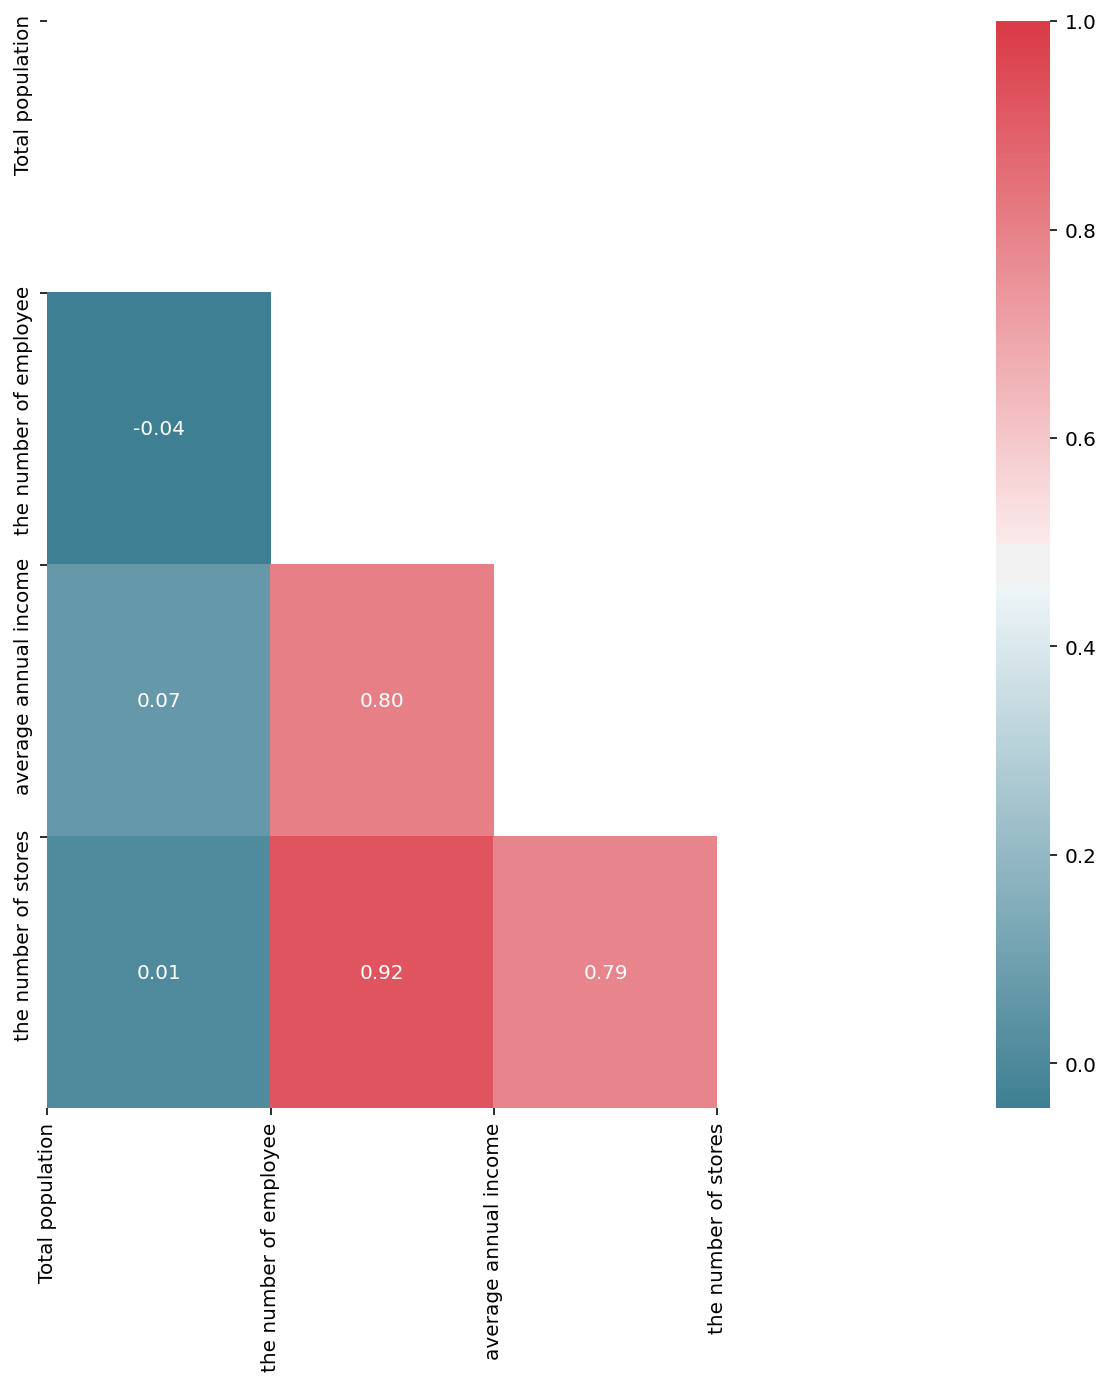

In [0]:
heatMap(seoul_full_df, mirror=False)

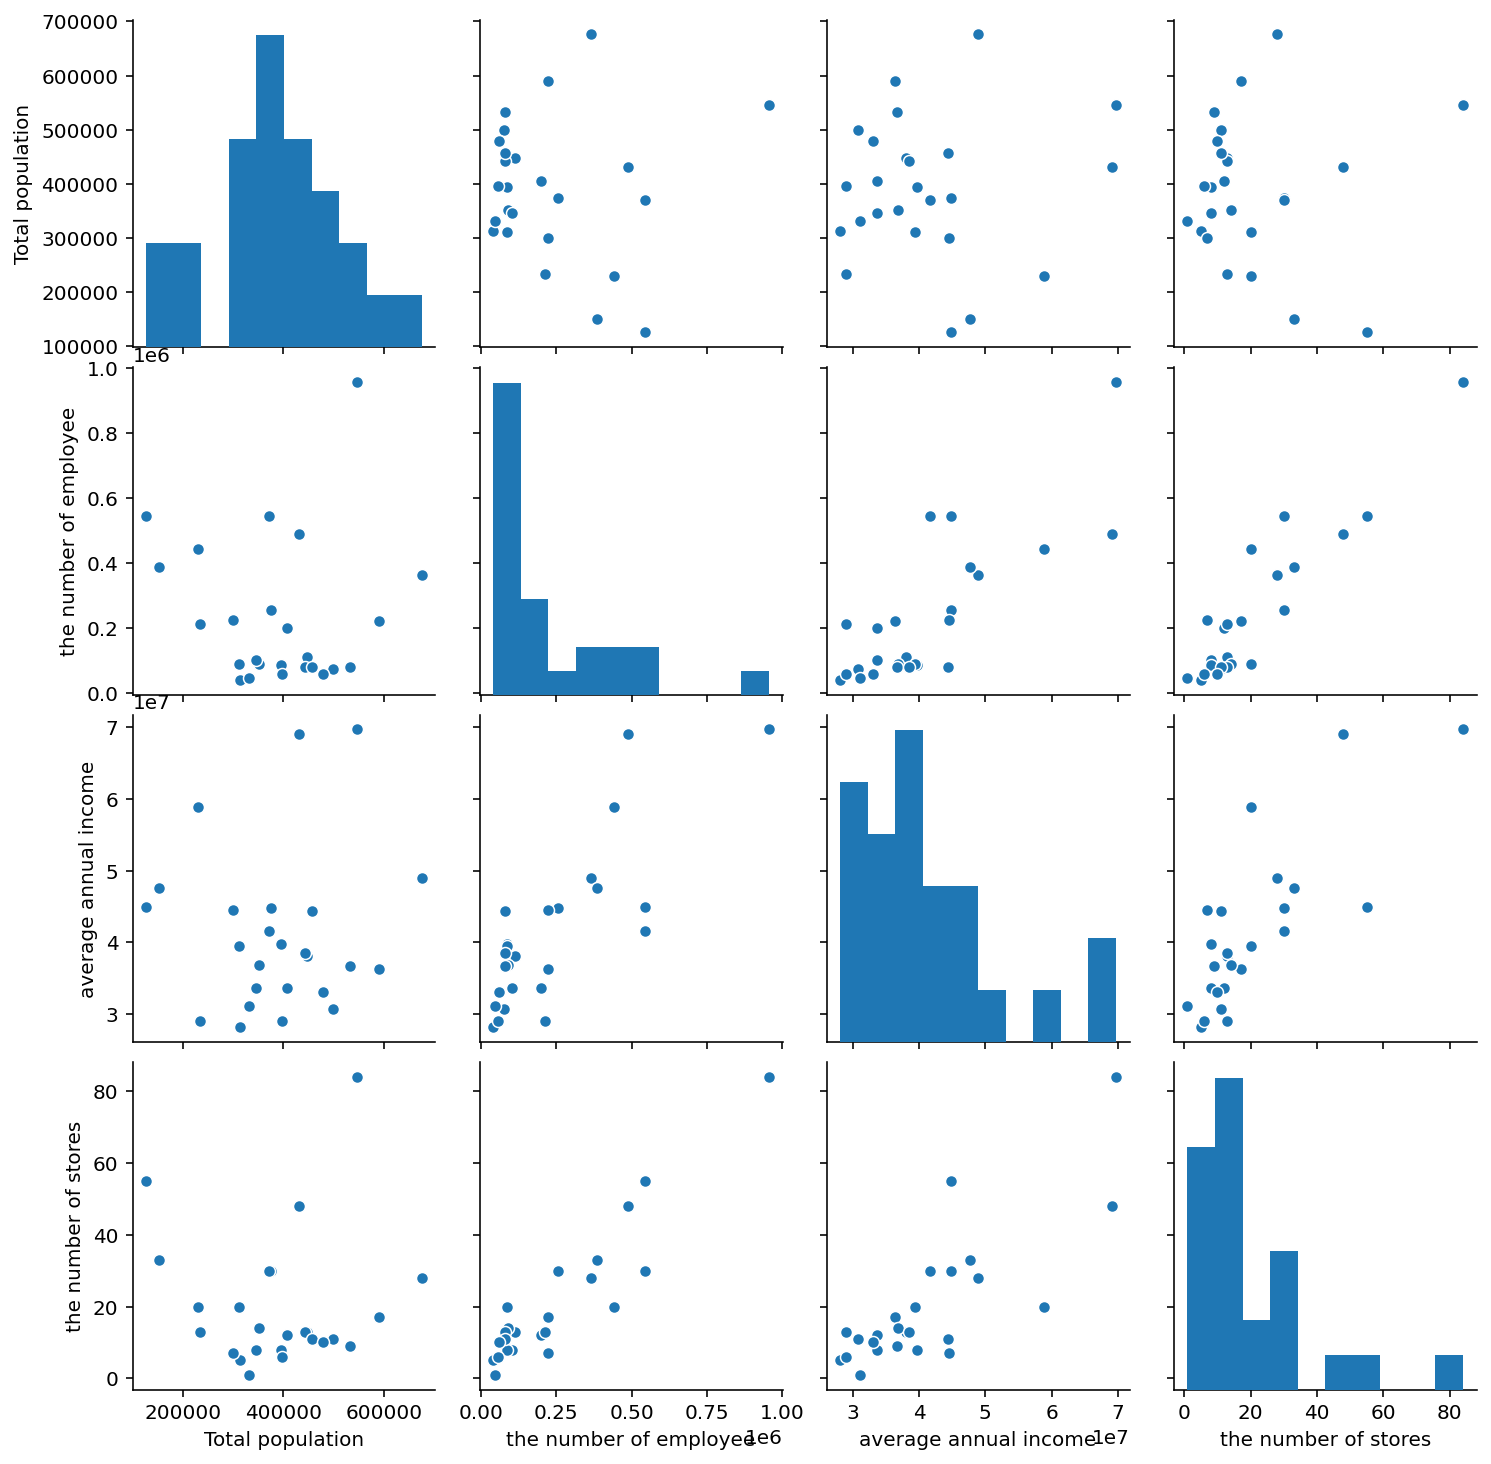

In [0]:
sns.pairplot(seoul_full_df)